In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Ranjani\Downloads\chococrunch.csv")
df["nutriments"]

0        {'carbohydrates': 42, 'carbohydrates_100g': 4....
1        {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2        {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3        {'fruits-vegetables-legumes-estimate-from-ingr...
4        {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                               ...                        
12092    {'carbohydrates': 5.7, 'carbohydrates_100g': 5...
12093    {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
12094    {'carbohydrates': 57, 'carbohydrates_100g': 57...
12095    {'carbohydrates': 51, 'carbohydrates_100g': 51...
12096    {'carbohydrates': 38.9, 'carbohydrates_100g': ...
Name: nutriments, Length: 12097, dtype: object

In [2]:
# 2. Convert single-quote strings → dict

import json

def safe_parse(x):
    if pd.isna(x) or str(x).strip() == "":
        return {}  # empty → empty dict
    try:
        # Replace single quotes and strip extra spaces
        s = str(x).strip().replace("'", '"')
        return json.loads(s)
    except Exception as e:
        # If parsing fails, return empty dict and optionally print error
        # print("Failed to parse:", x)
        return {}

df["nutriments"] = df["nutriments"].apply(safe_parse)

wanted = [
    "energy-kcal_value", "energy-kj_value", "carbohydrates_value",
    "sugars_value", "fat_value", "saturated-fat_value", "proteins_value",
    "salt_value", "sodium_value", "fiber_value",
    "fruits-vegetables-nuts-estimate-from-ingredients_100g",
    "nutrition-score-fr", "nova-group"
]

nutri_df = pd.json_normalize(df["nutriments"])

for col in wanted:
    if col not in nutri_df.columns:
        nutri_df[col] = pd.NA

nutri_df = nutri_df[wanted].add_prefix("nutriments_")

final_df = df.drop(columns=["nutriments"]).join(nutri_df)

final_df.head(100)

,brands,code,product_name,nutriments_energy-kcal_value,nutriments_energy-kj_value,nutriments_carbohydrates_value,nutriments_sugars_value,nutriments_fat_value,nutriments_saturated-fat_value,nutriments_proteins_value,nutriments_salt_value,nutriments_sodium_value,nutriments_fiber_value,nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g,nutriments_nutrition-score-fr,nutriments_nova-group
0,Sidi Ali,6111035000430,Sidi Ali,0.0,20.0,42.0,14.00,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,1.0,NaN
1,Jaouda,6111242100992,Perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,0.0,NaN,3.0
2,sidi ali,6111035002175,Sidi Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0,NaN
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0,1.0
4,AQUAFINA,6111252421568,اكوافينا,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00508,0.002032,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sos,6111251753912,611251753912,73.0,303.0,8.7,2.30,3.3,0.4,1.3,0.83000,0.332000,1.4,0.0,4.0,NaN
96,سلطان,6111248360130,Aïn Soltane,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00000,0.000000,NaN,0.0,0.0,NaN
97,8dh,6111003031107,NaN,180.0,NaN,0.6,0.16,6.4,1.5,30.1,0.50000,0.200000,NaN,0.0,-2.0,3.0
98,Bjorg,3229820100234,Fourrés Chocolat Noir,481.0,2017.0,65.0,27.00,20.0,6.9,7.6,0.49000,0.196000,5.3,0.0,18.0,4.0


In [3]:
# Select all nutriments columns
cols = final_df.filter(like="nutriments_").columns

# Convert all to numeric safely
final_df[cols] = final_df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.strip(), errors='coerce'))

# Verify dtypes
print(final_df[cols].dtypes)

nutriments_energy-kcal_value                                        float64
nutriments_energy-kj_value                                          float64
nutriments_carbohydrates_value                                      float64
nutriments_sugars_value                                             float64
nutriments_fat_value                                                float64
nutriments_saturated-fat_value                                      float64
nutriments_proteins_value                                           float64
nutriments_salt_value                                               float64
nutriments_sodium_value                                             float64
nutriments_fiber_value                                              float64
nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g    float64
nutriments_nutrition-score-fr                                       float64
nutriments_nova-group                                               float64
dtype: objec

In [4]:
# Select all nutriments columns
cols = final_df.filter(like="nutriments_").columns

# Mean
print("Mean:\n", final_df[cols].mean(), "\n")

# Median
print("Median:\n", final_df[cols].median(), "\n")

# Mode (most frequent)
print("Mode:\n", final_df[cols].mode().iloc[0], "\n")  # first row if multiple modes

# Max
print("Max:\n", final_df[cols].max(), "\n")

# Min
print("Min:\n", final_df[cols].min(), "\n")


Mean:
 nutriments_energy-kcal_value                                        2.809756e+02
nutriments_energy-kj_value                                          1.221057e+03
nutriments_carbohydrates_value                                      2.965926e+01
nutriments_sugars_value                                             1.145917e+01
nutriments_fat_value                                                1.493374e+01
nutriments_saturated-fat_value                                      5.157604e+00
nutriments_proteins_value                                           7.372730e+00
nutriments_salt_value                                               1.782532e+01
nutriments_sodium_value                                             7.130128e+00
nutriments_fiber_value                                              7.418357e+08
nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g    1.805665e+01
nutriments_nutrition-score-fr                                       8.980918e+00
nutriments_nova-group

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_df['nutriments_energy-kcal_value'], kde=True)
plt.show()

In [61]:
final_df['code'].mode()

0             370950
1            1465204
2            1799095
3           10065907
4           16103403
           ...      
149    8480000862020
150    8710522924327
151    8711000523124
152    8711200552795
153    8722700136224
Name: code, Length: 154, dtype: int64

In [4]:
final_df['nutriments_energy-kcal_value'].skew() #Median

np.float64(70.51634813592993)

In [5]:
final_df['nutriments_energy-kj_value'].skew()  #Mean

np.float64(0.3787736209774457)

In [6]:
final_df['nutriments_carbohydrates_value'].skew() #Median

np.float64(73.73695046038821)

In [7]:
final_df['nutriments_sugars_value'].skew() #Median

np.float64(10.76918934466541)

In [8]:
final_df['nutriments_fat_value'].skew() #Median

np.float64(62.49943744364067)

In [9]:
final_df['nutriments_saturated-fat_value'].skew()  #Median

np.float64(19.44313054593129)

In [10]:
final_df['nutriments_proteins_value'].skew()  #Median

np.float64(85.97402862992264)

In [11]:
final_df['nutriments_salt_value'].skew()  #Median

np.float64(97.21076778197865)

In [12]:
final_df['nutriments_sodium_value'].skew()  #Median

np.float64(97.21076778197856)

In [13]:
final_df['nutriments_fiber_value'].skew()  #Median

np.float64(90.7634287585038)

In [14]:
final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].skew()  #Median

np.float64(1.7191896575588257)

In [15]:
final_df['nutriments_nutrition-score-fr'].skew() #Median

np.float64(0.5506833676889645)

In [16]:
final_df['nutriments_nova-group'].skew() #Mode

np.float64(-1.3293081696017144)

In [14]:
print("Before:", final_df['product_name'].isna().sum(), "missing values")

final_df['product_name'] = final_df['product_name'].fillna(final_df['product_name'].mode()[0])

print("After:", final_df['product_name'].isna().sum(), "missing values")

Before: 576 missing values
After: 0 missing values


In [15]:
print("Before:", final_df['brands'].isna().sum(), "missing values")

final_df['brands'] = final_df['brands'].fillna(final_df['brands'].mode()[0])

print("After:", final_df['brands'].isna().sum(), "missing values")

Before: 676 missing values
After: 0 missing values


In [16]:
#applying median on  because skew is 70 (very high)

print("Before:", final_df['nutriments_energy-kcal_value'].isna().sum(), "missing values")

final_df['nutriments_energy-kcal_value'] = final_df['nutriments_energy-kcal_value'].fillna(final_df['nutriments_energy-kcal_value'].median())

print("After:", final_df['nutriments_energy-kcal_value'].isna().sum(), "missing values")

Before: 793 missing values
After: 0 missing values


In [18]:
final_df['nutriments_energy-kcal_value']

0          0.0
1         97.0
2        241.0
3        241.0
4          0.0
         ...  
12092     32.0
12093     42.0
12094    428.0
12095    341.0
12096    296.0
Name: nutriments_energy-kcal_value, Length: 12097, dtype: float64

In [17]:
print("Before:", final_df['nutriments_carbohydrates_value'].isna().sum(), "missing values")

final_df['nutriments_carbohydrates_value'] = final_df['nutriments_carbohydrates_value'].fillna(final_df['nutriments_carbohydrates_value'].median())

print("After:", final_df['nutriments_carbohydrates_value'].isna().sum(), "missing values")

Before: 788 missing values
After: 0 missing values


In [20]:
final_df['nutriments_carbohydrates_value']

0        42.0
1         9.4
2        15.0
3        15.0
4         0.0
         ... 
12092     5.7
12093     9.2
12094    57.0
12095    51.0
12096    38.9
Name: nutriments_carbohydrates_value, Length: 12097, dtype: float64

In [18]:
print("Before:", final_df['nutriments_sugars_value'].isna().sum(), "missing values")

final_df['nutriments_sugars_value'] = final_df['nutriments_sugars_value'].fillna(final_df['nutriments_sugars_value'].median())

print("After:", final_df['nutriments_sugars_value'].isna().sum(), "missing values")

Before: 994 missing values
After: 0 missing values


In [19]:
print("Before:", final_df['nutriments_fat_value'].isna().sum(), "missing values")

final_df['nutriments_fat_value'] = final_df['nutriments_fat_value'].fillna(final_df['nutriments_fat_value'].median())

print("After:", final_df['nutriments_fat_value'].isna().sum(), "missing values")


Before: 763 missing values
After: 0 missing values


In [20]:
print("Before:", final_df['nutriments_saturated-fat_value'].isna().sum(), "missing values")

final_df['nutriments_saturated-fat_value'] = final_df['nutriments_saturated-fat_value'].fillna(final_df['nutriments_saturated-fat_value'].median())

print("After:", final_df['nutriments_saturated-fat_value'].isna().sum(), "missing values")



Before: 1075 missing values
After: 0 missing values


In [21]:

print("Before:", final_df['nutriments_proteins_value'].isna().sum(), "missing values")

final_df['nutriments_proteins_value'] = final_df['nutriments_proteins_value'].fillna(final_df['nutriments_proteins_value'].median())

print("After:", final_df['nutriments_proteins_value'].isna().sum(), "missing values")

Before: 773 missing values
After: 0 missing values


In [22]:

print("Before:", final_df['nutriments_salt_value'].isna().sum(), "missing values")

final_df['nutriments_salt_value'] = final_df['nutriments_salt_value'].fillna(final_df['nutriments_salt_value'].median())

print("After:", final_df['nutriments_salt_value'].isna().sum(), "missing values")

Before: 1115 missing values
After: 0 missing values


In [23]:
print("Before:", final_df['nutriments_sodium_value'].isna().sum(), "missing values")

final_df['nutriments_sodium_value'] = final_df['nutriments_sodium_value'].fillna(final_df['nutriments_sodium_value'].median())

print("After:", final_df['nutriments_sodium_value'].isna().sum(), "missing values")

Before: 1115 missing values
After: 0 missing values


In [24]:
print("Before:", final_df['nutriments_fiber_value'].isna().sum(), "missing values")

final_df['nutriments_fiber_value'] = final_df['nutriments_fiber_value'].fillna(final_df['nutriments_fiber_value'].median())

print("After:", final_df['nutriments_fiber_value'].isna().sum(), "missing values")

Before: 3859 missing values
After: 0 missing values


In [25]:


print("Before:", final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna().sum(), "missing values")

final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'] = final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].median())

print("After:", final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna().sum(), "missing values")



Before: 751 missing values
After: 0 missing values


In [26]:
print("Before:", final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna().sum(), "missing values")

final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'] = final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].median())

print("After:", final_df['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna().sum(), "missing values")

Before: 0 missing values
After: 0 missing values


In [27]:

print("Before:", final_df['nutriments_energy-kj_value'].isna().sum(), "missing values")

final_df['nutriments_energy-kj_value'] = final_df['nutriments_energy-kj_value'].fillna(final_df['nutriments_energy-kj_value'].mean())

print("After:", final_df['nutriments_energy-kj_value'].isna().sum(), "missing values")


Before: 5612 missing values
After: 0 missing values


In [28]:
print("Before:", final_df['nutriments_nutrition-score-fr'].isna().sum(), "missing values")

final_df['nutriments_nutrition-score-fr'] = final_df['nutriments_nutrition-score-fr'].fillna(final_df['nutriments_nutrition-score-fr'].median())

print("After:", final_df['nutriments_nutrition-score-fr'].isna().sum(), "missing values")

Before: 1721 missing values
After: 0 missing values


In [29]:
print("Before:", final_df['nutriments_nova-group'].isna().sum(), "missing values")

final_df['nutriments_nova-group'] = final_df['nutriments_nova-group'].fillna(final_df['nutriments_nova-group'].mode()[0])

print("After:", final_df['nutriments_nova-group'].isna().sum(), "missing values")

Before: 1301 missing values
After: 0 missing values


In [30]:
#sugar_to_carbs_ration column

final_df['sugar_to_carb_ratio'] = (final_df['nutriments_sugars_value'] / final_df['nutriments_carbohydrates_value'])
final_df['sugar_to_carb_ratio']=final_df['sugar_to_carb_ratio'].fillna(final_df['sugar_to_carb_ratio'].median())
final_df['sugar_to_carb_ratio'].isna().sum()

np.int64(0)

In [31]:
#calorie_category colum

def classify_calorie(kcal):
    if kcal < 100:
        return "Low"
    elif kcal <= 300:
        return "Moderate"
    else:
        return "High"

final_df['calorie_category'] = final_df['nutriments_energy-kcal_value'].apply(classify_calorie)
final_df.loc[:, ['nutriments_energy-kcal_value','calorie_category']].head(100)

,nutriments_energy-kcal_value,calorie_category
0,0.0,Low
1,97.0,Low
2,241.0,Moderate
3,241.0,Moderate
4,0.0,Low
...,...,...
95,73.0,Low
96,0.0,Low
97,180.0,Moderate
98,481.0,High


In [39]:
final_df

,brands,code,product_name,nutriments_energy-kcal_value,nutriments_energy-kj_value,nutriments_carbohydrates_value,nutriments_sugars_value,nutriments_fat_value,nutriments_saturated-fat_value,nutriments_proteins_value,nutriments_salt_value,nutriments_sodium_value,nutriments_fiber_value,nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g,nutriments_nutrition-score-fr,nutriments_nova-group,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,Sidi Ali,6111035000430,Sidi Ali,0.0,20.000000,42.0,14.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,1.0,4.0,0.333333,Low,Low Sugar,Yes
1,Jaouda,6111242100992,Perly,97.0,406.000000,9.4,4.1,3.0,1.4,8.0,0.37265,0.149060,2.5,0.0,7.0,3.0,0.436170,Low,Low Sugar,No
2,sidi ali,6111035002175,Sidi Ali,241.0,1221.057312,15.0,4.1,6.3,1.4,5.6,65.00000,26.000000,2.5,0.0,0.0,4.0,0.273333,Moderate,Low Sugar,Yes
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle,241.0,1221.057312,15.0,4.1,6.3,1.4,5.6,65.00000,26.000000,2.5,0.0,0.0,1.0,0.273333,Moderate,Low Sugar,No
4,AQUAFINA,6111252421568,اكوافينا,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,0.0,0.0,0.0,4.0,0.423864,Low,Low Sugar,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,Bjorg,3229820789910,Amande Noisette,32.0,134.000000,5.7,4.8,1.0,0.1,0.5,0.14000,0.056000,0.5,0.0,5.0,3.0,0.842105,Low,Low Sugar,No
12093,"Paquito, Sélection Intermarché",3250390769811,100% pur jus orange sans pulpe,42.0,179.000000,9.2,8.2,0.5,0.1,0.7,0.01000,0.004000,0.5,100.0,4.0,1.0,0.891304,Low,Low Sugar,No
12094,Carrefour,3560070581870,Crunchy,428.0,1791.000000,57.0,5.0,15.0,2.9,11.0,0.10000,0.040000,14.0,0.0,-1.0,4.0,0.087719,High,Low Sugar,Yes
12095,"Marque Repère, Épi d'Or",3564700562802,Brioche tranchée,341.0,1442.000000,51.0,13.0,11.0,3.8,8.6,0.82000,0.328000,2.2,0.0,14.0,4.0,0.254902,High,Low Sugar,Yes


In [32]:
#sugar_category column

def sugar_category(val):
    if val<100:
        return 'Low Sugar'
    elif val<=300:
        return 'Moderate Sugar'
    else:
        return 'High Sugar'

final_df['sugar_category']=final_df['nutriments_sugars_value'].apply(sugar_category)
final_df.loc[:, ['nutriments_sugars_value','sugar_category']].head(100)   
       

,nutriments_sugars_value,sugar_category
0,14.00,Low Sugar
1,4.10,Low Sugar
2,4.10,Low Sugar
3,4.10,Low Sugar
4,0.00,Low Sugar
...,...,...
95,2.30,Low Sugar
96,0.00,Low Sugar
97,0.16,Low Sugar
98,27.00,Low Sugar


In [33]:
#is_ultra_processed

classify = final_df['nutriments_nova-group'].apply(lambda x: "Yes" if x ==4 else "No") 
final_df['is_ultra_processed']=classify
final_df.loc[:,['nutriments_nova-group','is_ultra_processed']]

,nutriments_nova-group,is_ultra_processed
0,4.0,Yes
1,3.0,No
2,4.0,Yes
3,1.0,No
4,4.0,Yes
...,...,...
12092,3.0,No
12093,1.0,No
12094,4.0,Yes
12095,4.0,Yes


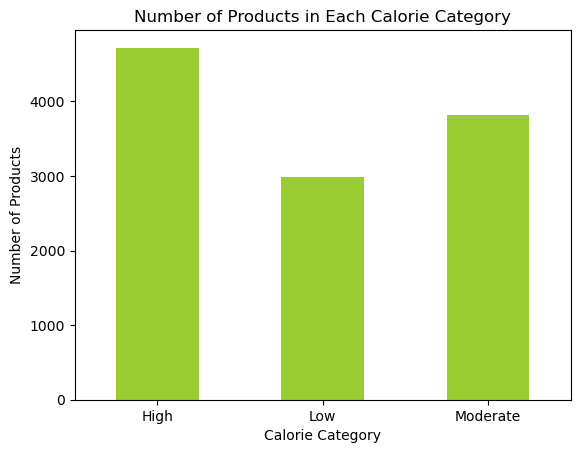

In [40]:
# 1. Bar charts to show the number of products in each calorie_category
import seaborn as sns
import matplotlib.pyplot as plt
calorie_group = final_df.groupby('calorie_category')['product_name'].count()
calorie_group.plot(kind='bar', color='yellowgreen')##C8A2C8
plt.xlabel('Calorie Category', color='black')
plt.xticks(rotation=0)
plt.ylabel('Number of Products', color='black')
plt.title('Number of Products in Each Calorie Category')
plt.show()

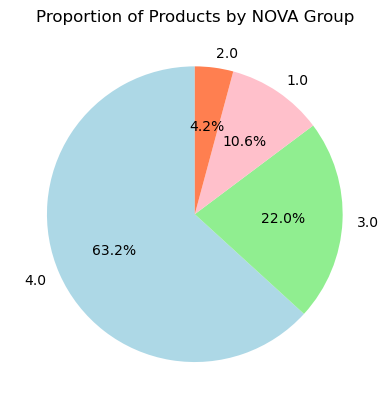

In [41]:
# 2. Pie charts to illustrate the proportion of products in each nova-group

nova_counts = final_df['nutriments_nova-group'].value_counts()
colors = ['lightblue', 'lightgreen', 'pink', 'coral']
plt.pie(nova_counts, labels=nova_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Products by NOVA Group')
plt.show()

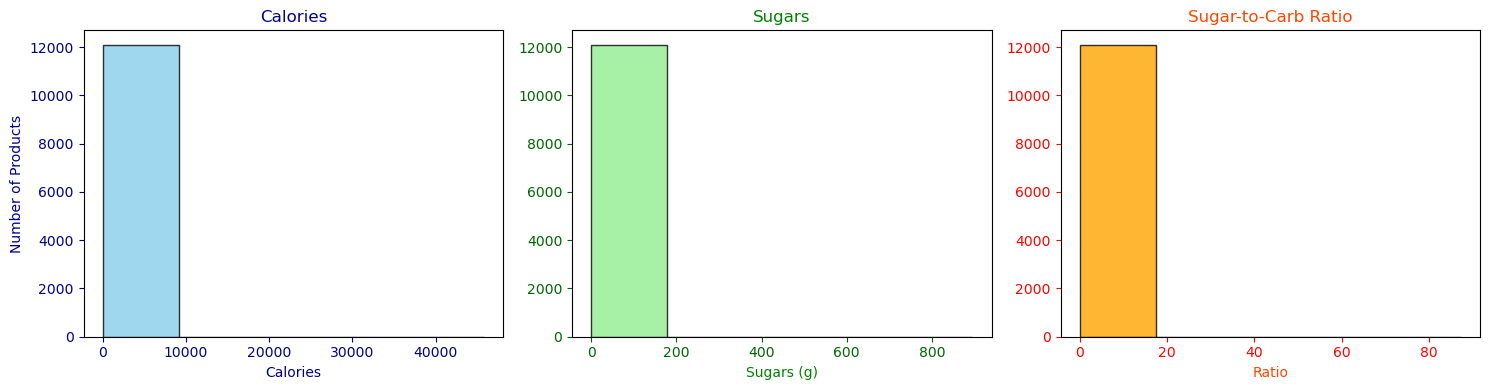

In [46]:
# 3. Histograms for distribution of calories, sugars, or sugar-to-carb ratio

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Calories histogram
axes[0].hist(final_df['nutriments_energy-kcal_value'], bins=5, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Calories', color='darkblue')
axes[0].set_xlabel('Calories', color='darkblue')
axes[0].set_ylabel('Number of Products', color='darkblue')
axes[0].tick_params(axis='x', rotation=0, colors='navy')
axes[0].tick_params(axis='y', colors='navy')

# Sugars histogram
axes[1].hist(final_df['nutriments_sugars_value'], bins=5, color='lightgreen', edgecolor='black', alpha=0.8)
axes[1].set_title('Sugars', color='green')
axes[1].set_xlabel('Sugars (g)', color='green')
axes[1].tick_params(axis='x', rotation=0, colors='darkgreen')
axes[1].tick_params(axis='y', colors='darkgreen')

# Sugar-to-Carb Ratio histogram
axes[2].hist(final_df['sugar_to_carb_ratio'], bins=5, color='orange', edgecolor='black', alpha=0.8)
axes[2].set_title('Sugar-to-Carb Ratio', color='orangered')
axes[2].set_xlabel('Ratio', color='orangered')
axes[2].tick_params(axis='x', rotation=0, colors='red')
axes[2].tick_params(axis='y', colors='red')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [56]:
import numpy as np
count_inf = np.isinf(final_df['sugar_to_carb_ratio']).sum()
res=final_df['sugar_to_carb_ratio'].replace([np.inf, -np.inf], 0) 
res

0        0.333333
1        0.436170
2        0.273333
3        0.273333
4        0.423864
           ...   
12092    0.842105
12093    0.891304
12094    0.087719
12095    0.254902
12096    0.745501
Name: sugar_to_carb_ratio, Length: 12097, dtype: float64

<Figure size 1000x1000 with 0 Axes>

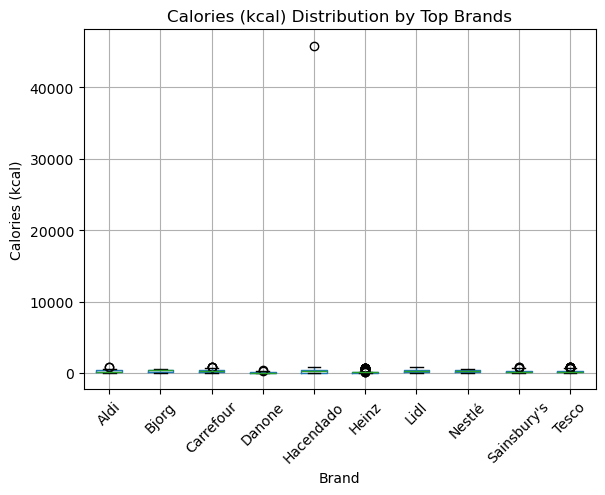

In [47]:
import matplotlib.pyplot as plt

top_brands = (
    final_df["brands"]
    .value_counts()
    .head(10)
    .index)

subset = final_df[final_df["brands"].isin(top_brands)]

plt.figure(figsize=(10,10))
subset.boxplot(
    column="nutriments_energy-kcal_value",
    by="brands",
    rot=45
)

plt.title("Calories (kcal) Distribution by Top Brands")
plt.suptitle("")
plt.xlabel("Brand")
plt.ylabel("Calories (kcal)")
plt.show()


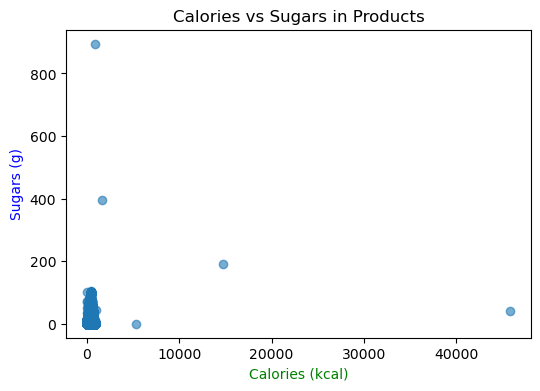

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(
    final_df["nutriments_energy-kcal_value"] ,
    final_df["nutriments_sugars_value"],
    alpha=0.6
)

plt.title("Calories vs Sugars in Products")
plt.xlabel("Calories (kcal)",color='green')
plt.ylabel("Sugars (g)", color='blue')
plt.show()


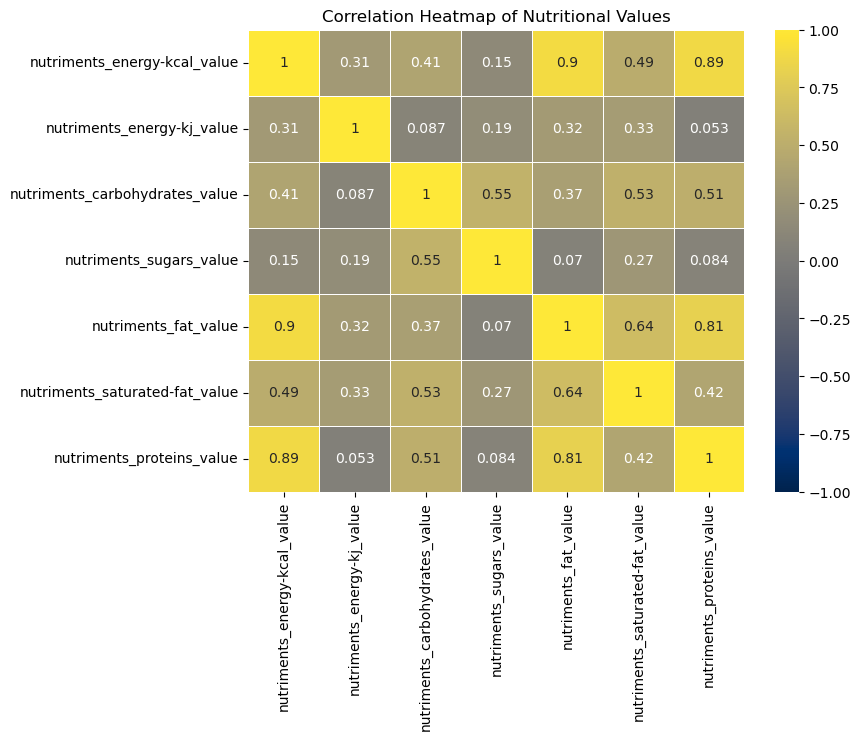

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

nutri_cols = [
    "nutriments_energy-kcal_value",
    "nutriments_energy-kj_value",
    "nutriments_carbohydrates_value",
    "nutriments_sugars_value",
    "nutriments_fat_value",
    "nutriments_saturated-fat_value",
    "nutriments_proteins_value"
]

corr = final_df[nutri_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,      
    cmap="cividis", 
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Nutritional Values")
plt.show()


C:\Users\Ranjani\AppData\Local\Temp\ipykernel_21636\2545142864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


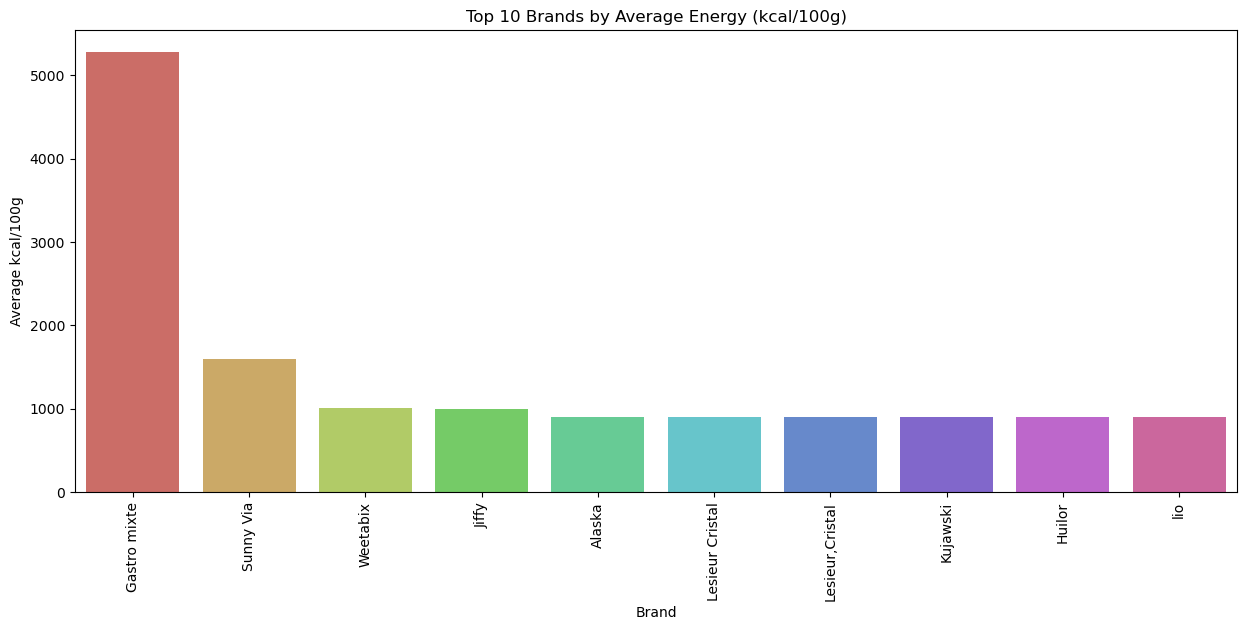

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

brand_avg = (
    final_df.groupby('brands')['nutriments_energy-kcal_value']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(15,6))
sns.barplot(
    x=brand_avg['brands'][:10],
    y=brand_avg['nutriments_energy-kcal_value'][:10],
    palette='hls'
)
plt.title('Top 10 Brands by Average Energy (kcal/100g)')
plt.xticks(rotation=90)
plt.ylabel("Average kcal/100g")
plt.xlabel("Brand")
plt.show()


In [52]:
import sqlite3
conn = sqlite3.connect('mydb.db')
cursor = conn.cursor()

In [53]:
cursor.execute('''CREATE TABLE product_info (
                    product_code varchar2(100) PRIMARY KEY,
                    product_name varchar2(100),
                    brand varchar2(100)
                )''')

OperationalError: table product_info already exists

In [54]:
cursor.execute('''select * from product_info''')

In [ ]:
cursor.execute('''CREATE TABLE product_info (
                    product_code varchar2(100) PRIMARY KEY,
                    product_name varchar2(100),
                    brand varchar2(100)
                )''')


In [ ]:
cursor.execute('''CREATE TABLE nutrient_info (
                    product_code varchar2(100),
                    energy_kcal_value FLOAT,
                    energy_kj_value FLOAT,
                    carbohydrates_value FLOAT,
                    sugars_value FLOAT,
                    fat_value FLOAT,
                    saturated_fat_value FLOAT,
                    proteins_value FLOAT,
                    fiber_value FLOAT,
                    salt_value FLOAT,
                    sodium_value FLOAT,
                    fruits_vegetables_nuts_est_from_ingr_100g FLOAT,
                    nutrition_score_fr INTEGER,
                    nova_group INTEGER,
                    FOREIGN KEY (product_code) REFERENCES product_info(product_code))''')

In [ ]:
cursor.execute('''CREATE TABLE derived_metrics (
                    product_code varchar2(100),
                    sugar_to_carb_ratio FLOAT,
                    calorie_category varchar2(100),
                    sugar_category varchar2(100),
                    is_ultra_processed varchar2(100),
                    FOREIGN KEY (product_code) REFERENCES product_info(product_code))''')

In [34]:
final_df

,brands,code,product_name,nutriments_energy-kcal_value,nutriments_energy-kj_value,nutriments_carbohydrates_value,nutriments_sugars_value,nutriments_fat_value,nutriments_saturated-fat_value,nutriments_proteins_value,nutriments_salt_value,nutriments_sodium_value,nutriments_fiber_value,nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g,nutriments_nutrition-score-fr,nutriments_nova-group,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,Sidi Ali,6111035000430,Sidi Ali,0.0,20.000000,42.0,14.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,1.0,4.0,0.333333,Low,Low Sugar,Yes
1,Jaouda,6111242100992,Perly,97.0,406.000000,9.4,4.1,3.0,1.4,8.0,0.37265,0.149060,2.5,0.0,7.0,3.0,0.436170,Low,Low Sugar,No
2,sidi ali,6111035002175,Sidi Ali,241.0,1221.057312,15.0,4.1,6.3,1.4,5.6,65.00000,26.000000,2.5,0.0,0.0,4.0,0.273333,Moderate,Low Sugar,Yes
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle,241.0,1221.057312,15.0,4.1,6.3,1.4,5.6,65.00000,26.000000,2.5,0.0,0.0,1.0,0.273333,Moderate,Low Sugar,No
4,AQUAFINA,6111252421568,اكوافينا,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,0.0,0.0,0.0,4.0,0.423864,Low,Low Sugar,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,Bjorg,3229820789910,Amande Noisette,32.0,134.000000,5.7,4.8,1.0,0.1,0.5,0.14000,0.056000,0.5,0.0,5.0,3.0,0.842105,Low,Low Sugar,No
12093,"Paquito, Sélection Intermarché",3250390769811,100% pur jus orange sans pulpe,42.0,179.000000,9.2,8.2,0.5,0.1,0.7,0.01000,0.004000,0.5,100.0,4.0,1.0,0.891304,Low,Low Sugar,No
12094,Carrefour,3560070581870,Crunchy,428.0,1791.000000,57.0,5.0,15.0,2.9,11.0,0.10000,0.040000,14.0,0.0,-1.0,4.0,0.087719,High,Low Sugar,Yes
12095,"Marque Repère, Épi d'Or",3564700562802,Brioche tranchée,341.0,1442.000000,51.0,13.0,11.0,3.8,8.6,0.82000,0.328000,2.2,0.0,14.0,4.0,0.254902,High,Low Sugar,Yes


In [75]:
sql = '''INSERT OR REPLACE INTO product_info (product_code, product_name, brand) VALUES (?, ?, ?)'''
for index, row in final_df.iterrows():
    values = (row['code'], row['product_name'], row['brands'])
    cursor.execute(sql, values)





In [107]:
result_df = pd.read_sql_query("SELECT * FROM product_info", conn)
result_df

,product_code,product_name,brand
0,6111035000430,Sidi Ali,Sidi Ali
1,6111242100992,Perly,Jaouda
2,6111035002175,Sidi Ali,sidi ali
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali"
4,6111252421568,اكوافينا,AQUAFINA
...,...,...,...
11938,3229820789910,Amande Noisette,Bjorg
11939,3250390769811,100% pur jus orange sans pulpe,"Paquito, Sélection Intermarché"
11940,3560070581870,Crunchy,Carrefour
11941,3564700562802,Brioche tranchée,"Marque Repère, Épi d'Or"


In [82]:
conn.commit()

In [78]:
sql = '''
INSERT OR REPLACE INTO nutrient_info (
    product_code,
    energy_kcal_value,
    energy_kj_value,
    carbohydrates_value,
    sugars_value,
    fat_value,
    saturated_fat_value,
    proteins_value,
    fiber_value,
    salt_value,
    sodium_value,
    fruits_vegetables_nuts_est_from_ingr_100g,
    nutrition_score_fr,
    nova_group
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''

for index, row in final_df.iterrows():
    values = (
        row['code'],
        row['nutriments_energy-kcal_value'],
        row['nutriments_energy-kj_value'],
        row['nutriments_carbohydrates_value'],
        row['nutriments_sugars_value'],
        row['nutriments_fat_value'],
        row['nutriments_saturated-fat_value'],
        row['nutriments_proteins_value'],
        row.get('nutriments_fiber_value', None),
        row.get('nutriments_salt_value', None),
        row.get('nutriments_sodium_value', None),
        row.get('nutriments_fruits_vegetables_nuts_est_from_ingr_100g', None),
        row.get('nutrition_score_fr', None),
        row.get('nova_group', None)
    )
    cursor.execute(sql, values)



In [153]:
sql = '''
INSERT OR REPLACE INTO nutrient_info (
    product_code,
    energy_kcal_value,
    energy_kj_value,
    carbohydrates_value,
    sugars_value,
    fat_value,
    saturated_fat_value,
    proteins_value,
    fiber_value,
    salt_value,
    sodium_value,
    fruits_vegetables_nuts_est_from_ingr_100g,
    nutrition_score_fr,
    nova_group
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''

for index, row in final_df.iterrows():
    values = (
        row['code'],
        row['nutriments_energy-kcal_value'],
        row['nutriments_energy-kj_value'],
        row['nutriments_carbohydrates_value'],
        row['nutriments_sugars_value'],
        row['nutriments_fat_value'],
        row['nutriments_saturated-fat_value'],
        row['nutriments_proteins_value'],
        row['nutriments_fiber_value'],
        row['nutriments_salt_value'],
        row['nutriments_sodium_value'],
        row['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'],
        row['nutriments_nutrition-score-fr'],
        row['nutriments_nova-group']
    )
    cursor.execute(sql, values)

In [ ]:
result_df = pd.read_sql_query("SELECT * FROM nutrient_info", conn)
result_df

In [ ]:
final_df

In [80]:
sql = '''INSERT OR REPLACE INTO derived_metrics (
    product_code,
    sugar_to_carb_ratio,
    calorie_category,
    sugar_category,
    is_ultra_processed
) VALUES (?, ?, ?, ?, ?)'''

for index, row in final_df.iterrows():
    values = (
        row['code'],
        row['sugar_to_carb_ratio'],
        row['calorie_category'],
        row['sugar_category'],
        row['is_ultra_processed']
    )
    cursor.execute(sql, values)

conn.commit()


In [83]:
result_df = pd.read_sql_query("SELECT * FROM derived_metrics", conn)
result_df

,product_code,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,0.333333,Low,Low Sugar,Yes
1,6111242100992,0.436170,Low,Low Sugar,No
2,6111035002175,0.273333,Moderate,Low Sugar,Yes
3,6111035000058,0.273333,Moderate,Low Sugar,No
4,6111252421568,0.423864,Low,Low Sugar,Yes
...,...,...,...,...,...
12092,3229820789910,0.842105,Low,Low Sugar,No
12093,3250390769811,0.891304,Low,Low Sugar,No
12094,3560070581870,0.087719,High,Low Sugar,Yes
12095,3564700562802,0.254902,High,Low Sugar,Yes


In [114]:
#1.Count products per brand
cursor.execute('''SELECT brand,count(product_code) product_count FROM product_info
group by brand''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,"07 x Aldi 09.25, 09 x Aldi 09.25, 11 x Aldi 09...",1
1,"1001 Delights (Lidl), Envia, Lidl, Milbona, Mi...",1
2,"1540 Vestby, Norwegen, Oluf Lorentzen AS, Tove...",1
3,"166, 43122 Parma - Italy, Barilla, Barilla - B...",1
4,"1664 Blonde, Kronenbourg",1
...,...,...
4022,كنور,1
4023,كوسومار,1
4024,لاسيگون,1
4025,نلزه,1


In [115]:
#2.Count unique products per brand
cursor.execute('''SELECT brand,count(distinct product_code) product_count FROM product_info
group by brand''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,"07 x Aldi 09.25, 09 x Aldi 09.25, 11 x Aldi 09...",1
1,"1001 Delights (Lidl), Envia, Lidl, Milbona, Mi...",1
2,"1540 Vestby, Norwegen, Oluf Lorentzen AS, Tove...",1
3,"166, 43122 Parma - Italy, Barilla, Barilla - B...",1
4,"1664 Blonde, Kronenbourg",1
...,...,...
4022,كنور,1
4023,كوسومار,1
4024,لاسيگون,1
4025,نلزه,1


In [135]:
#3. Top 5 brands by product count

cursor.execute('''SELECT brand,count(distinct product_code) product_count FROM product_info
group by brand
ORDER BY product_count DESC
LIMIT 5''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,Hacendado,1012
1,Tesco,266
2,Carrefour,144
3,Heinz,95
4,Bjorg,94


In [134]:
#4. Products with missing product name

cursor.execute('''SELECT brand FROM product_info
where product_name is null''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1


""


In [133]:
#5.  Number of unique brands
cursor.execute('''SELECT distinct brand FROM product_info''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0
0,Sidi Ali
1,Jaouda
2,sidi ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali"
4,AQUAFINA
...,...
4022,Golden Bridge
4023,PAQUITO
4024,favrichon
4025,"CMI (Carrefour Marchandises Internationales), ..."


# 6. Products with code starting with '3'
cursor.execute('''SELECT distinct product_name,product_code FROM product_info
where product_code like "3%"''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

In [156]:
# Nutrients_Info Queries
result_df = pd.read_sql_query("SELECT * FROM nutrient_info", conn)
result_df.head(100)

,product_code,energy_kcal_value,energy_kj_value,carbohydrates_value,sugars_value,fat_value,saturated_fat_value,proteins_value,fiber_value,salt_value,sodium_value,fruits_vegetables_nuts_est_from_ingr_100g,nutrition_score_fr,nova_group
0,6111035000430,0.0,20.000000,42.0,14.00,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,1,4
1,6111242100992,97.0,406.000000,9.4,4.10,3.0,1.4,8.0,2.5,0.37265,0.149060,0.0,7,3
2,6111035002175,241.0,1221.057312,15.0,4.10,6.3,1.4,5.6,2.5,65.00000,26.000000,0.0,0,4
3,6111035000058,241.0,1221.057312,15.0,4.10,6.3,1.4,5.6,2.5,65.00000,26.000000,0.0,0,1
4,6111252421568,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.00508,0.002032,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6111251753912,73.0,303.000000,8.7,2.30,3.3,0.4,1.3,1.4,0.83000,0.332000,0.0,4,4
96,6111248360130,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,2.5,0.00000,0.000000,0.0,0,4
97,6111003031107,180.0,1221.057312,0.6,0.16,6.4,1.5,30.1,2.5,0.50000,0.200000,0.0,-2,3
98,3229820100234,481.0,2017.000000,65.0,27.00,20.0,6.9,7.6,5.3,0.49000,0.196000,0.0,18,4


In [171]:
# 1. Top 10 products with highest energy-kcal_value

cursor.execute('''select * from (SELECT distinct product_code, dense_rank()over( order by energy_kcal_value desc) rk 
FROM  nutrient_info n )where rk<=10 ''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1.head(10)


,0,1
0,8480000054647,1
1,5010029221701,2
2,6111259090132,3
3,3088543506255,4
4,72486002205,5
5,36000291452,6
6,6111099000599,7
7,6111024001516,7
8,6111024002186,7
9,6111099000582,7


In [170]:
#2. Average sugars_value per nova-group

cursor.execute('''SELECT distinct avg(sugars_value),nova_group FROM nutrient_info n
group by nova_group''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,5.862713,1
1,16.909645,2
2,6.943587,3
3,12.649613,4


In [1]:
#3.Count products with fat_value > 20g

cursor.execute('''SELECT distinct n.fat_value,count(n.product_code)product_cnt FROM nutrient_info n
where fat_value>20
group by fat_value''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

NameError: name 'cursor' is not defined

In [172]:
#4. Average carbohydrates_value per product

cursor.execute('''SELECT distinct n.product_code product,avg(carbohydrates_value) average_val FROM nutrient_info n
group by product_code''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,10001295,65.000000
1,10001417,5.600000
2,100035000430,15.000000
3,10022708,8.300000
4,10023594,5.300000
...,...,...
11938,96619885725,21.428571
11939,96619955886,67.220000
11940,972376,5.400000
11941,9780201379624,74.670000


In [173]:
#5. Products with sodium_value > 1g

cursor.execute('''SELECT distinct n.product_code product,sodium_value FROM nutrient_info n
where sodium_value>1''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,6111035002175,26.00
1,6111035000058,26.00
2,3274080005003,21.00
3,50184453,4.32
4,6111035001635,48.00
...,...,...
656,863699000108,85.00
657,767707001678,100.00
658,5060366570086,4.60
659,8422229110308,1.28


In [174]:
#6. Count products with non-zero fruits-vegetables-nuts content

cursor.execute('''SELECT distinct n.product_code product,fruits_vegetables_nuts_est_from_ingr_100g FROM nutrient_info n
where fruits_vegetables_nuts_est_from_ingr_100g!=0''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,50184453,0.734863
1,7622210449283,6.806818
2,3017620425035,13.000000
3,5449000147417,22.727273
4,3175680011480,10.800000
...,...,...
6498,3250390576600,100.000000
6499,3111900350557,3.000000
6500,3421557502422,16.000000
6501,3250390769811,100.000000


In [175]:
#7. Products with energy-kcal_value > 500

cursor.execute('''SELECT distinct n.product_code product,energy_kcal_value FROM nutrient_info n
where energy_kcal_value>500''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,6111099003897,675.0
1,3017620425035,539.0
2,3046920028363,584.0
3,6111184004129,592.0
4,20995553,579.0
...,...,...
1724,5060544130248,574.0
1725,5053990175888,524.0
1726,5053827157018,521.0
1727,3660603004828,551.0


In [176]:
# derived_metrics
result_df = pd.read_sql_query("SELECT * FROM derived_metrics", conn)
result_df

,product_code,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,0.333333,Low,Low Sugar,Yes
1,6111242100992,0.436170,Low,Low Sugar,No
2,6111035002175,0.273333,Moderate,Low Sugar,Yes
3,6111035000058,0.273333,Moderate,Low Sugar,No
4,6111252421568,0.423864,Low,Low Sugar,Yes
...,...,...,...,...,...
12092,3229820789910,0.842105,Low,Low Sugar,No
12093,3250390769811,0.891304,Low,Low Sugar,No
12094,3560070581870,0.087719,High,Low Sugar,Yes
12095,3564700562802,0.254902,High,Low Sugar,Yes


In [177]:
#1. Count products per calorie_category

cursor.execute('''SELECT distinct count(product_code) product,calorie_category FROM derived_metrics 
group by calorie_category''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,4857,High
1,3067,Low
2,4173,Moderate


In [184]:
#2. Count of High Sugar products

cursor.execute(''' select count(product_code),sugar_category FROM derived_metrics
where sugar_category="High Sugar"''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,2,High Sugar


In [186]:
#3. Average sugar_to_carb_ratio for High Calorie products

cursor.execute('''select avg(sugar_to_carb_ratio),calorie_category FROM derived_metrics
where calorie_category="High"''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,0.453119,High


In [188]:
#4.  Products that are both High Calorie and High Sugar

cursor.execute('''select product_code FROM derived_metrics
where calorie_category="High"
and sugar_category="High Sugar"''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0
0,3088543506255
1,3400938267266


In [189]:
#5.  Number of products marked as ultra-processed

cursor.execute('''select count(product_code),is_ultra_processed FROM derived_metrics
where is_ultra_processed="Yes"''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,7648,Yes


In [190]:
#6.  Products with sugar_to_carb_ratio > 0.7

cursor.execute('''select product_code,sugar_to_carb_ratio FROM derived_metrics
where sugar_to_carb_ratio > 0.7''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,5449000054227,1.000000
1,3046920028004,0.857143
2,3017620425035,0.979130
3,5449000147417,1.827957
4,6111162000839,1.027230
...,...,...
4196,3250390576600,0.990000
4197,3270190020288,1.000000
4198,3229820789910,0.842105
4199,3250390769811,0.891304


In [191]:
#7.  Average sugar_to_carb_ratio per calorie_category

cursor.execute('''select calorie_category,avg(sugar_to_carb_ratio) FROM derived_metrics
group by calorie_category''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,High,0.453119
1,Low,0.717926
2,Moderate,0.446269


In [ ]:
# Join Queries

In [196]:
# 1. Top 5 brands with most High Calorie products

cursor.execute('''select * from (SELECT distinct brand, dense_rank()over( order by energy_kcal_value desc) rk 
FROM  nutrient_info n,product_info p
where p.product_code=n.product_code)where rk<=10 ''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,Hacendado,1
1,Weetabix,2
2,Gastro mixte,3
3,Sunny Via,4
4,Jiffy,5
5,Alaska,6
6,lio,7
7,Lesieur,7
8,Huilor,7
9,ALHORRA,7


In [198]:
#2. Average energy-kcal_value for each calorie_category

cursor.execute('''select d.calorie_category,avg(n.energy_kcal_value)
FROM  nutrient_info n,derived_metrics d
where d.product_code=n.product_code
group by d.calorie_category''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,High,492.149057
1,Low,48.363145
2,Moderate,198.098965


In [207]:
#3. Count of ultra-processed products per brand

cursor.execute('''select distinct count(p.product_code),p.brand
FROM nutrient_info n,derived_metrics d,product_info p
where d.product_code=n.product_code
and p.product_code=n.product_code
and is_ultra_processed="Yes"
group by p.brand''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,5,ALPRO
1,2,Accro
2,2,Acti Leaf
3,3,Activia
4,3,"Activia, Activia yoghurt cereals/fibres, Danone"
...,...,...
837,3,tesco
838,4,violife
839,2,wildfarmed
840,2,yosoy


In [208]:
#4. Products with High Sugar and High Calorie along with brand

cursor.execute('''select brand,d.calorie_category,d.sugar_category FROM derived_metrics d,product_info p
where d.calorie_category="High"
and d.sugar_category="High Sugar"
and p.product_code=d.product_code''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1,2
0,Sunny Via,High,High Sugar
1,Pipas de la casa,High,High Sugar


In [209]:
#5. Average sugar content per brand for ultra-processed products

cursor.execute('''select distinct avg(sugars_value),p.brand
FROM nutrient_info n,derived_metrics d,product_info p
where d.product_code=n.product_code
and p.product_code=n.product_code
and is_ultra_processed="Yes"
group by p.brand''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,5.0,"07 x Aldi 09.25, 09 x Aldi 09.25, 11 x Aldi 09..."
1,12.8,"1001 Delights (Lidl), Envia, Lidl, Milbona, Mi..."
2,26.0,2 KEEP NATURAL BITES
3,4.1,2025
4,0.0,"25l, Red Bull, Zero 0, RedBull"
...,...,...
2702,4.1,سنطرال
2703,0.5,كنور
2704,100.0,كوسومار
2705,7.3,لاسيگون


In [212]:
#6. Number of products with fruits/vegetables/nuts content in each calorie_category

cursor.execute('''select distinct count(fruits_vegetables_nuts_est_from_ingr_100g),calorie_category
FROM nutrient_info n,derived_metrics d
where d.product_code=n.product_code
group by d.calorie_category''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1
0,4971,High
1,3143,Low
2,4291,Moderate


In [217]:
#7. Top 5 products by sugar_to_carb_ratio with their calorie and sugar category

cursor.execute('''SELECT sugar_to_carb_ratio,calorie_category,sugar_category FROM product_info p, derived_metrics d
where d.product_code=p.product_code
ORDER BY sugar_to_carb_ratio DESC
LIMIT 5
''')
rec = cursor.fetchall()

data = rec
df1 = pd.DataFrame(data)
df1

,0,1,2
0,87.234043,Low,Low Sugar
1,41.000000,High,Low Sugar
2,29.285714,Low,Low Sugar
3,20.500000,Low,Low Sugar
4,19.523810,Low,Low Sugar


In [7]:
!pip install pymysql

In [11]:
import pymysql
conn = pymysql.connect(host = "localhost",
                       user = "root",
                       password = "rootMYSQL",
                       database = "mydb")
cursor = conn.cursor()

In [47]:
cursor.execute('''
  CREATE TABLE product_info (
    product_code VARCHAR(100) PRIMARY KEY,
    product_name TEXT,
    brand TEXT
)
''')


0

In [48]:
sql = '''
    INSERT INTO product_info (product_code, product_name, brand)
    VALUES (%s, %s, %s)
    ON DUPLICATE KEY UPDATE
        product_name = VALUES(product_name),
        brand = VALUES(brand)
'''

for index, row in final_df.iterrows():
    values = (row['code'], row['product_name'], row['brands'])
    cursor.execute(sql, values)

conn.commit()   # save changes



In [41]:
len(final_df['code'])

12097

In [49]:
cursor.execute('''CREATE TABLE nutrient_info (
    product_code VARCHAR(100),
    energy_kcal_value FLOAT,
    energy_kj_value FLOAT,
    carbohydrates_value FLOAT,
    sugars_value FLOAT,
    fat_value FLOAT,
    saturated_fat_value FLOAT,
    proteins_value FLOAT,
    fiber_value FLOAT,
    salt_value FLOAT,
    sodium_value FLOAT,
    fruits_vegetables_nuts_est_from_ingr_100g FLOAT,
    nutrition_score_fr INT,
    nova_group INT,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)''')

0

In [50]:
cursor.execute('''CREATE TABLE derived_metrics (
    product_code VARCHAR(100),
    sugar_to_carb_ratio FLOAT,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed TEXT,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)''')

0

In [52]:
sql = '''
INSERT INTO nutrient_info (
    product_code,
    energy_kcal_value,
    energy_kj_value,
    carbohydrates_value,
    sugars_value,
    fat_value,
    saturated_fat_value,
    proteins_value,
    fiber_value,
    salt_value,
    sodium_value,
    fruits_vegetables_nuts_est_from_ingr_100g,
    nutrition_score_fr,
    nova_group
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
ON DUPLICATE KEY UPDATE
    energy_kcal_value = VALUES(energy_kcal_value),
    energy_kj_value = VALUES(energy_kj_value),
    carbohydrates_value = VALUES(carbohydrates_value),
    sugars_value = VALUES(sugars_value),
    fat_value = VALUES(fat_value),
    saturated_fat_value = VALUES(saturated_fat_value),
    proteins_value = VALUES(proteins_value),
    fiber_value = VALUES(fiber_value),
    salt_value = VALUES(salt_value),
    sodium_value = VALUES(sodium_value),
    fruits_vegetables_nuts_est_from_ingr_100g = VALUES(fruits_vegetables_nuts_est_from_ingr_100g),
    nutrition_score_fr = VALUES(nutrition_score_fr),
    nova_group = VALUES(nova_group)
'''

for index, row in final_df.iterrows():
    values = (
        row['code'],
        row['nutriments_energy-kcal_value'],
        row['nutriments_energy-kj_value'],
        row['nutriments_carbohydrates_value'],
        row['nutriments_sugars_value'],
        row['nutriments_fat_value'],
        row['nutriments_saturated-fat_value'],
        row['nutriments_proteins_value'],
        row['nutriments_fiber_value'],
        row['nutriments_salt_value'],
        row['nutriments_sodium_value'],
        row['nutriments_fruits-vegetables-nuts-estimate-from-ingredients_100g'],
        row['nutriments_nutrition-score-fr'],
        row['nutriments_nova-group']
    )
    cursor.execute(sql, values)

conn.commit()  # Save changes


In [57]:
sql = '''
INSERT INTO derived_metrics (
    product_code,
    sugar_to_carb_ratio,
    calorie_category,
    sugar_category,
    is_ultra_processed
)
VALUES (%s, %s, %s, %s, %s)
ON DUPLICATE KEY UPDATE
    sugar_to_carb_ratio = VALUES(sugar_to_carb_ratio),
    calorie_category = VALUES(calorie_category),
    sugar_category = VALUES(sugar_category),
    is_ultra_processed = VALUES(is_ultra_processed)
'''

for index, row in final_df.iterrows():
    values = (
        row['code'],
        row['sugar_to_carb_ratio'],
        row['calorie_category'],
        row['sugar_category'],
        row['is_ultra_processed']
    )
    cursor.execute(sql, values)

conn.commit()  # Save changes
